# Flight Price Prediction

Data Description

Importing Libraries

In [104]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Loading the Data Set

In [105]:
df=pd.read_excel('Data_Train.csv')

In [106]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [107]:
df.shape     #checking data dimensions.

(10683, 11)

In [108]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Checking for Null Values

In [109]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [111]:
df.dropna(inplace=True)

Working with datetime data.

Working with 'Date_of_Journey' column.

In [113]:
df["Journey_day"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [114]:
df["Journey_month"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [115]:
df["Journey_year"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.year

In [116]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [117]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


Working with 'Dep_Time' column. 

In [118]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time',axis=1,inplace=True)

In [119]:
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25


Working with 'Arrival_Time' column.

In [120]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

In [121]:
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

In [122]:
df.drop("Arrival_Time",axis=1,inplace=True)

In [123]:
df.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30


Working with "Duration" column.

In [124]:
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [125]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,2019,16,50,21,35


Checking for null values in the finally extracted data.

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

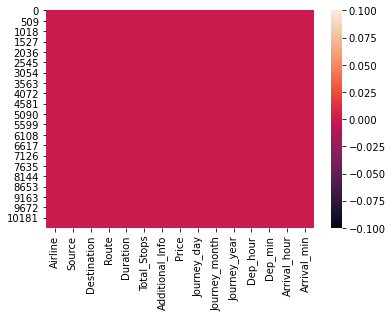

In [129]:
sns.heatmap(df.isnull())

Descriptive Statistics.

In [130]:
df.describe()

,Duration,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.020502,9087.214567,13.509081,4.708575,2019.0,12.491013,24.409287,13.349186,24.690601
std,507.830133,4611.548810,8.479363,1.164408,0.0,5.748820,18.767801,6.859317,16.506808
min,5.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000


In [131]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [132]:
df.drop('Route',axis=1,inplace=True)

Analysis of categorical data.

In [134]:
cate=['Airline', 'Source', 'Destination', 'Total_Stops','Additional_Info']

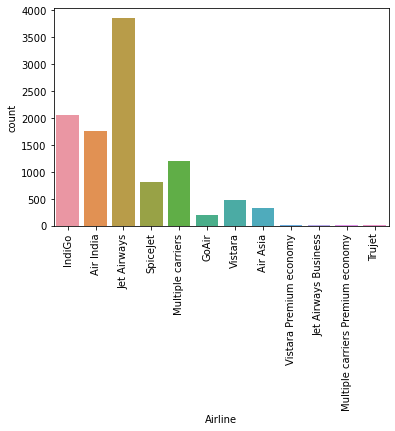

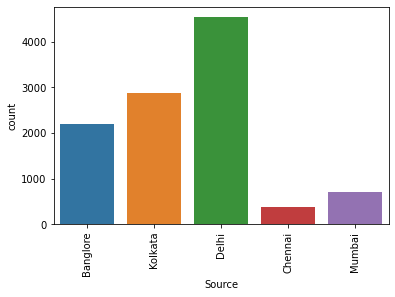

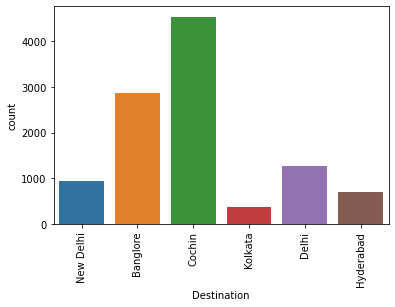

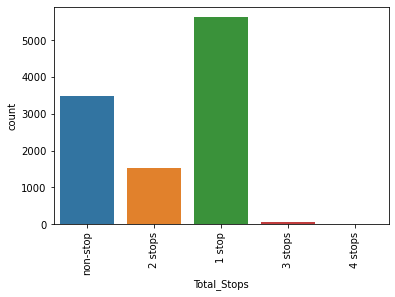

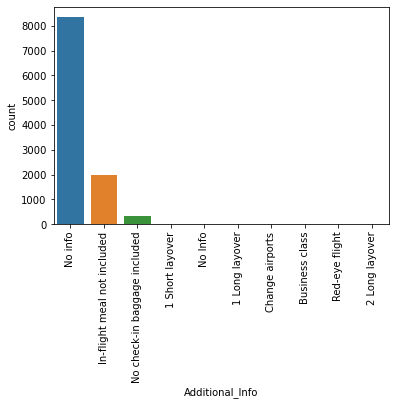

In [135]:
for k in cate:
    sns.countplot(x=k,data=df)
    plt.xticks(rotation=90)
    plt.show()
    
    

In [136]:
df.drop('Additional_Info',axis=1,inplace=True)

In [137]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,2019,16,50,21,35


In [138]:
df['Journey_year'].value_counts()

2019    10682
Name: Journey_year, dtype: int64

In [139]:
df.drop('Journey_year',axis=1,inplace=True)

Correlation Matrix.

In [140]:
corr=df.corr()

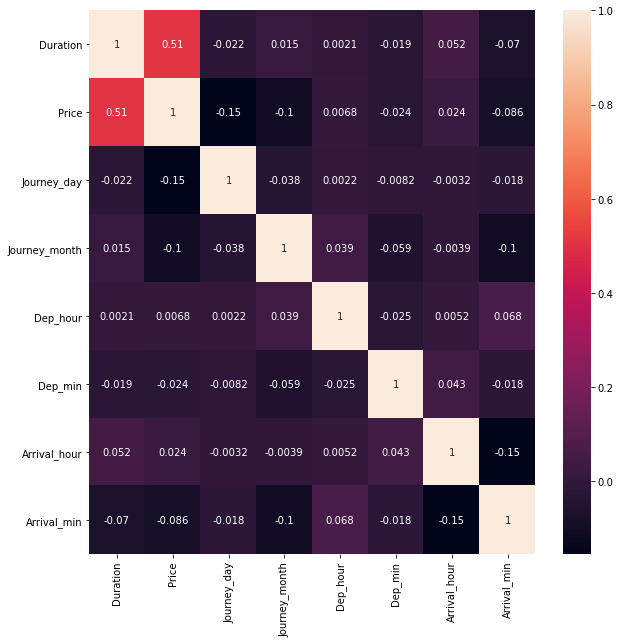

In [141]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Dealing with categorical variables. 

Encoding

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
le=LabelEncoder()

In [144]:
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Total_Stops']=le.fit_transform(df['Total_Stops'])

Splitting independent and dependent variables.

In [145]:
x=df.drop('Price',axis=1)
y=df['Price']

Required Libraries to train the machine.  

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=54)

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [149]:
lr=LinearRegression()
dr=DecisionTreeRegressor()
sv=SVR()
rf=RandomForestRegressor()

In [150]:
model=[lr,dr,sv,rf]

In [151]:
import numpy as np

In [152]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=34)
    m.fit(x_train,y_train)
    predv=m.predict(x_test)
    print('mean_squared_error:',mean_squared_error(y_test,predv))
    print('mean_absolute_error:',mean_absolute_error(y_test,predv))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predv)))
    print('\n')

mean_squared_error: 12420282.775806494
mean_absolute_error: 2543.3854961052652
root_mean_squared_error 3524.2421562382024


mean_squared_error: 6759490.216098196
mean_absolute_error: 1429.4363026521062
root_mean_squared_error 2599.9019627859425


mean_squared_error: 18068663.030818067
mean_absolute_error: 3082.731487896883
root_mean_squared_error 4250.725000610845


mean_squared_error: 4101235.2834811886
mean_absolute_error: 1230.7401814837788
root_mean_squared_error 2025.1506816731412




Hyper Parameter Tunning. 

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
grid_param={'criterion':['mse','mae']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='r2',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'mae'}


In [155]:
gd_pred=gd.best_estimator_.predict(x_test)

In [156]:
r2_score(y_test,gd_pred)

0.9445771835742922

In [157]:
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,gd_pred)))

root_mean_squared_error 1074.0441334333361


saving the model

In [158]:
import joblib
joblib.dump(gd.best_estimator_,'flight_price.obj')

['flight_price.obj']

 Now the task is to predict the flight price with the given test data set of 2671 rows. Do the whole EDA process which we did for the train data set. 

# Test data.

We loaded train dataset as "df", now we will load the test data set as "df1"

In [159]:
df1=pd.read_excel('Data_test.csv')

In [160]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [161]:
df1.shape

(2671, 10)

In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [163]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

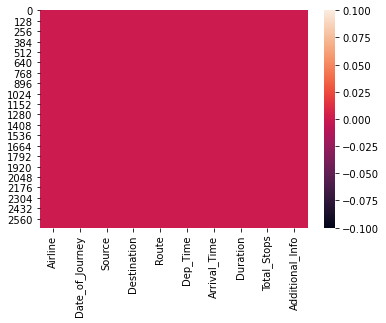

In [164]:
sns.heatmap(df1.isnull())

In [165]:
df1["Journey_day"] = pd.to_datetime(df1['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [167]:
df1["Journey_month"] = pd.to_datetime(df1['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [168]:
df1["Journey_year"] = pd.to_datetime(df1['Date_of_Journey'], format="%d/%m/%Y").dt.year

In [169]:
df1.drop('Date_of_Journey',axis=1,inplace=True)

In [171]:
df1['Dep_hour']=pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_min']=pd.to_datetime(df1['Dep_Time']).dt.minute
df1.drop('Dep_Time',axis=1,inplace=True)

In [172]:
df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour

In [173]:
df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute

In [174]:
df1.drop("Arrival_Time",axis=1,inplace=True)

In [175]:
df1['Duration']=df1['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [176]:
df1.drop('Route',axis=1,inplace=True)

In [177]:
df1.drop('Additional_Info',axis=1,inplace=True)

In [179]:
df1.Journey_year.value_counts()

2019    2671
Name: Journey_year, dtype: int64

In [180]:
df1.drop('Journey_year',axis=1,inplace=True)

In [181]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,655,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1 stop,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1 stop,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1 stop,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,non-stop,24,6,23,55,2,45


In [182]:
df1['Airline']=le.fit_transform(df1['Airline'])
df1['Source']=le.fit_transform(df1['Source'])
df1['Destination']=le.fit_transform(df1['Destination'])
df1['Total_Stops']=le.fit_transform(df1['Total_Stops'])

In [183]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,655,0,6,6,17,30,4,25
1,3,3,0,240,0,12,5,6,20,10,20
2,4,2,1,1425,0,21,5,19,15,19,0
3,6,2,1,780,0,21,5,8,0,21,0
4,0,0,2,170,4,24,6,23,55,2,45


# Loading the saved model to predict.



In [184]:
flight_test_fee=joblib.load('flight_price.obj')

In [185]:
flight_test_fee.predict(df1)

array([11041.55,  4226.  , 13958.54, ..., 14751.18, 13735.89,  7426.99])